# Libraries

In [1]:
import numpy as np
from numpy import exp, array, random, dot
from numpy.lib.function_base import append

import pandas as pd
import tensorflow as tf

# plotting
import seaborn as sns
from wordcloud import WordCloud
import matplotlib.pyplot as plt

import torch
from torch import nn
from torch.utils.data import DataLoader, Dataset

from google.colab import drive

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import cohen_kappa_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

# Loading Dataset

In [2]:
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [3]:
df = pd.read_csv("/content/gdrive/MyDrive/AUST/CSE 4.2/CSE 4238 Soft Computing Lab/Online/Assignment-2/Dataset.csv")
df

,Text,Sentiment
0,Kickers on my watchlist XIDE TIT SOQ PNK CPW B...,1
1,user: AAP MOVIE. 55% return for the FEA/GEED i...,1
2,user I'd be afraid to short AMZN - they are lo...,1
3,MNTA Over 12.00,1
4,OI Over 21.37,1
...,...,...
5786,Industry body CII said #discoms are likely to ...,-1
5787,"#Gold prices slip below Rs 46,000 as #investor...",-1
5788,Workers at Bajaj Auto have agreed to a 10% wag...,1
5789,"#Sharemarket LIVE: Sensex off day’s high, up 6...",1


# Data visualization

In [4]:
df.shape

(5791, 2)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5791 entries, 0 to 5790
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Text       5791 non-null   object
 1   Sentiment  5791 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 90.6+ KB


In [6]:
df['Sentiment'].unique()

array([ 1, -1])

In [7]:
df.describe()

,Sentiment
count,5791.000000
mean,0.272664
std,0.962192
min,-1.000000
25%,-1.000000
50%,1.000000
75%,1.000000
max,1.000000


In [8]:
# check the number of positive vs. negative tagged sentences

#df['Sentiment'].value_counts()

positives = df['Sentiment'][df.Sentiment == 1 ]
negatives = df['Sentiment'][df.Sentiment == -1 ]

print('Total length of the data is:         {}'.format(df.shape[0]))
print('No. of positve tagged sentences is:  {}'.format(len(positives)))
print('No. of negative tagged sentences is: {}'.format(len(negatives)))

Total length of the data is:         5791
No. of positve tagged sentences is:  3685
No. of negative tagged sentences is: 2106


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


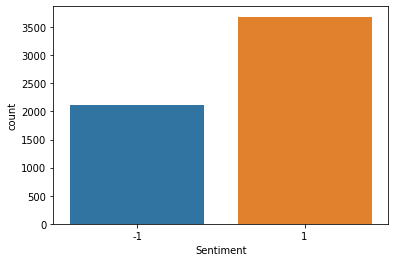

In [9]:
sns.countplot(df['Sentiment'])

In [10]:
# get a word count per of text
def word_count(words):
    return len(words.split())

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


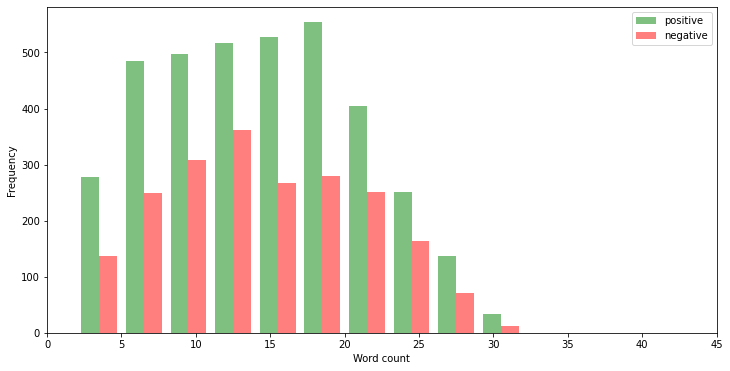

In [11]:
# plot word count distribution for both positive and negative 

#lenght = df["Text"].str.len()
#sns.displot(lenght, kde = True)

df['word count'] = df['Text'].apply(word_count)
p = df['word count'][df.Sentiment == 1]
n = df['word count'][df.Sentiment == -1]
plt.figure(figsize=(12,6))
plt.xlim(0,45)
plt.xlabel('Word count')
plt.ylabel('Frequency')
g = plt.hist([p, n], color=['g','r'], alpha=0.5, label=['positive','negative'])
plt.legend(loc='upper right')

In [12]:
from nltk.stem.porter import PorterStemmer
from nltk import word_tokenize, WordNetLemmatizer
import nltk
import re 
import string
import pickle
nltk.download('wordnet')
nltk.download('stopwords')
nltk.download('punkt')

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [13]:
from nltk.corpus import stopwords
stop_words=set(stopwords.words('english'))
print(stop_words)


{'can', 'some', 'an', 'theirs', 're', 'her', 'couldn', 'ourselves', 'what', 'not', 'doesn', 'herself', 'o', 'being', 'do', 'are', 'just', "that'll", "isn't", 'has', 'his', 'these', 'hadn', 'all', 'there', 'our', 'into', 'before', 'didn', "shouldn't", 'shouldn', 'then', 'its', 'am', 'by', 'other', 'more', 'when', 'hasn', 'this', 'and', 'myself', "mustn't", 'yourself', 'from', 'wouldn', 'at', 'same', 'between', 'me', 'how', 'through', 'itself', 'now', 'mightn', 'you', 'if', 'those', 'did', 'only', 'after', 'up', 'yourselves', 'each', 'had', "haven't", "you've", 'but', 'were', "won't", 've', 'needn', 'aren', 'ours', 'should', "you'd", 'which', "hadn't", 'no', 'why', 'over', 's', 'does', 'd', 'y', 'their', 'as', "shan't", 'in', 'with', "don't", "mightn't", 'it', 'or', 'than', 'while', 'is', 'below', 'mustn', 'was', 'don', 'who', 'doing', 'down', "couldn't", "hasn't", 'of', 'themselves', 'i', 'he', 'a', "doesn't", 'further', 'ma', 'for', 'the', "didn't", 'such', 'shan', 'yours', 'hers', 'we

In [14]:
word_list = list()
for i in range(len(df)):
    li = df.Text[i].split()
    for k in li:
        word_list.append(k)

In [15]:
from collections import Counter 
wordCounter = Counter(word_list)
countedWordDict = dict(wordCounter)
sortedWordDict = sorted(countedWordDict.items(),key = lambda x : x[1],reverse=True)
sortedWordDict[0:20]

[('the', 1796),
 ('to', 1668),
 ('a', 1280),
 ('on', 1032),
 ('of', 944),
 ('in', 891),
 ('AAP', 884),
 ('for', 868),
 ('and', 850),
 ('is', 811),
 ('-', 728),
 ('at', 541),
 ('this', 461),
 ('it', 454),
 ('I', 453),
 ('up', 357),
 ('user:', 340),
 ('from', 331),
 ('will', 330),
 ('be', 324)]

# Data Processing

In [16]:
seed = 170204067
torch.manual_seed(seed)

In [17]:
df["Sentiment"] = df["Sentiment"].replace(-1,0)
df["Sentiment"].value_counts()

1    3685
0    2106
Name: Sentiment, dtype: int64

In [18]:
#Checking if any null values present
(df.isnull().sum() / len(df))*100

Text          0.0
Sentiment     0.0
word count    0.0
dtype: float64

In [19]:
ps = PorterStemmer()
lemma = WordNetLemmatizer()
stopwordSet = set(stopwords.words("english"))

> The Preprocessing steps taken are:

* Lower Casing: Each text is converted to lowercase.
* Removing URLs: Links starting with "http" or "https" or "www" are replaced by "".

* Removing Usernames: Replace @Usernames with word "". (eg: "@XYZ" to "")
* Removing Short Words: Words with length less than 2 are removed.
* Removing Stopwords: Stopwords are the English words which does not add much meaning to a sentence. They can safely be ignored without sacrificing the meaning of the sentence. (eg: "the", "he", "have")
* Lemmatizing: Lemmatization is the process of converting a word to its base form. (e.g: “wolves” to “wolf”)

In [20]:

urlPattern = r"((http://)[^ ]*|(https://)[^ ]*|( www\.)[^ ]*)"
userPattern = '@[^\s]+'
def process_text(text):
  # Lower Casing
    text = text.lower()
    text=text[1:]
    # Removing all URls 
    text = re.sub(urlPattern,'',text)
    # Removing all @username.
    text = re.sub(userPattern,'',text) 
    #Remove punctuations
    text = text.translate(str.maketrans("","",string.punctuation))
    #tokenizing words
    tokens = word_tokenize(text)
    #Removing Stop Words
    final_tokens = [w for w in tokens if w not in stopwordSet]
    #reducing a word to its word stem 
    wordLemm = WordNetLemmatizer()
    finalwords=[]
    for w in final_tokens:
      if len(w)>1:
        word = wordLemm.lemmatize(w)
        finalwords.append(word)
    return ' '.join(finalwords)   

In [21]:
df['processed_text'] = df['Text'].apply(lambda x: process_text(x))
print('Text Preprocessing complete.')

Text Preprocessing complete.


In [22]:
print(df.shape)
df

(5791, 4)


,Text,Sentiment,word count,processed_text
0,Kickers on my watchlist XIDE TIT SOQ PNK CPW B...,1,20,ickers watchlist xide tit soq pnk cpw bpz aj t...
1,user: AAP MOVIE. 55% return for the FEA/GEED i...,1,16,ser aap movie 55 return feageed indicator 15 t...
2,user I'd be afraid to short AMZN - they are lo...,1,18,ser id afraid short amzn looking like nearmono...
3,MNTA Over 12.00,1,3,nta 1200
4,OI Over 21.37,1,3,2137
...,...,...,...,...
5786,Industry body CII said #discoms are likely to ...,0,19,ndustry body cii said discoms likely suffer ne...
5787,"#Gold prices slip below Rs 46,000 as #investor...",0,15,gold price slip r 46000 investor book profit a...
5788,Workers at Bajaj Auto have agreed to a 10% wag...,1,24,orkers bajaj auto agreed 10 wage cut period ap...
5789,"#Sharemarket LIVE: Sensex off day’s high, up 6...",1,18,sharemarket live sensex day high 600 point nif...


# Analyzing the data <a id="5"></a>

> #### Now we're going to analyse the preprocessed data to get an understanding of it. We'll plot Word Clouds for Positive and Negative tweets from our dataset and see which words occur the most.

### Word-Cloud for Negative tweets.

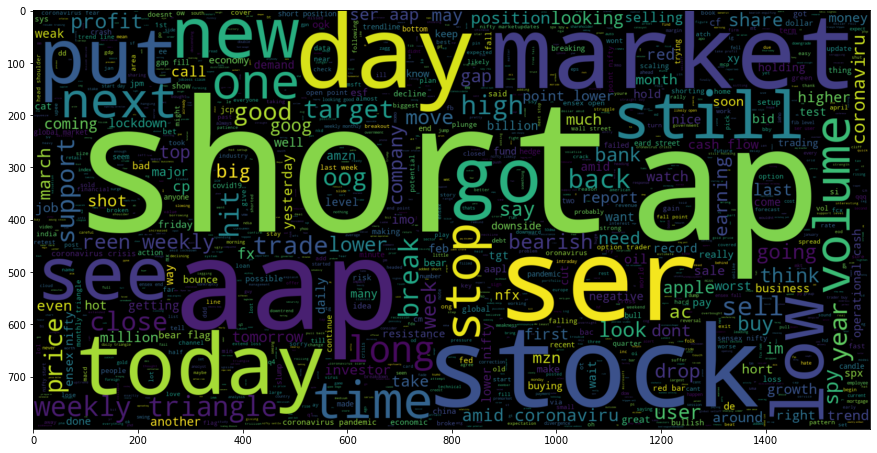

In [23]:
plt.figure(figsize = (15,15)) 
wc = WordCloud(max_words = 2000 , width = 1600 , height = 800).generate(" ".join(df[df.Sentiment == 0].processed_text))
plt.imshow(wc , interpolation = 'bilinear')

### Word-Cloud for Positive tweets.

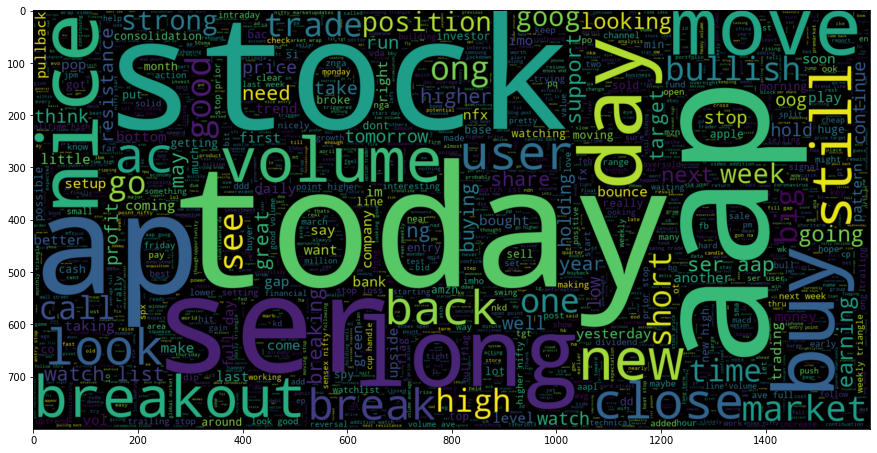

In [24]:
plt.figure(figsize = (15,15)) 
wc = WordCloud(max_words = 2000 , width = 1600 , height = 800).generate(" ".join(df[df.Sentiment == 1].processed_text))
plt.imshow(wc , interpolation = 'bilinear')

# Create the (B.O.W) bag of word model

In [25]:
cv = CountVectorizer(max_features = len(df))
X = cv.fit_transform(df['processed_text']).toarray()
y= df['Sentiment'].to_numpy()

#X = torch.from_numpy(X).type(torch.LongTensor)
#y = torch.from_numpy(y).type(torch.LongTensor)

X = torch.from_numpy(X)
y = torch.from_numpy(y)


## Split train and test

The Preprocessed Data is divided into 2 sets of data:

* Training Data: The dataset upon which the model would be trained on. Contains 80% data.
* Test Data: The dataset upon which the model would be tested against. Contains 20% data.




In [26]:
## Split the dataset into Training and Test set
X_train, X_test, y_train, y_test = train_test_split(X, y , test_size=0.2, random_state = seed)

X_train = X_train.type(torch.FloatTensor)
X_test = X_test.type(torch.FloatTensor)
y_train = y_train.type(torch.FloatTensor)
y_test = y_test.type(torch.FloatTensor)

In [27]:

#BATCH_SIZE = 264

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')



# Model Building <a id="7"></a>

**Neural Network**

In [28]:
class NeuralNetwork(nn.Module):
    def __init__(self, input_dim):
        super(NeuralNetwork, self).__init__()
        self.layer_1 = nn.Linear(input_dim, 512) 
        self.layer_2 = nn.Linear(512, 128) 
        self.layer_3 = nn.Linear(128, 1)   
        self.relu = nn.ReLU()
        self.sigmoid = nn.Sigmoid()
        self.dropout = nn.Dropout()
        # self.flatten = nn.Flatten()
       
     
  
        
    def forward(self, x):

        x = self.layer_1(x)
        x = self.dropout(x)
        x = self.relu(x)
        x = self.layer_2(x)
        x = self.dropout(x)
        x = self.relu(x)
        x = self.layer_3(x)
        logits = self.sigmoid(x)
        return logits

In [29]:
model = NeuralNetwork(len(df))
print(model)



NeuralNetwork(
  (layer_1): Linear(in_features=5791, out_features=512, bias=True)
  (layer_2): Linear(in_features=512, out_features=128, bias=True)
  (layer_3): Linear(in_features=128, out_features=1, bias=True)
  (relu): ReLU()
  (sigmoid): Sigmoid()
  (dropout): Dropout(p=0.5, inplace=False)
)


Optimization

In [30]:
"""
loss_fn = nn.BCELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=1e-3)

"""


import torch.optim as optim
optimizer = optim.Adam(model.parameters())

loss_fn = nn.BCEWithLogitsLoss()
model = model.to(device)
loss_fn = loss_fn.to(device)



We implement the function to calculate accuracy...

In [31]:
def binary_accuracy(preds, y):
    """
    Returns accuracy per batch, i.e. if you get 8/10 right, this returns 0.8, NOT 8
    """

    #round predictions to the closest integer
    rounded_preds = torch.round(torch.sigmoid(preds))
    correct = (rounded_preds == y).float() #convert into float for division 
    acc = correct.sum() / len(correct)
    return acc

In [32]:

def trainModel(model, loss_fn, optimizer):
    model.train()

    batch = 128
    size = X_test.shape[0]

    loss = 0
    acc = 0
    

    for i in range(X_train.shape[0]):
      x, y = X_train[i], torch.tensor([y_train[i]], dtype=torch.float)
    
      # Compute prediction 
      pred = model(x)
      loss += loss_fn(pred,y)
      acc += binary_accuracy(pred,y)
      
      if i>0 and (i+1)%batch == 0:
          # Backpropagation
          optimizer.zero_grad()
          loss.backward()
          optimizer.step()
         # print(f'Training Loss: {loss.item():.4f}', end="\r")
         # print(f'\tTraining Loss: {loss.item():.3f} | Training Acc: {acc.item()*100:.2f}%')
          loss = 0
          acc = 0
    print()
    return loss.item()/size, acc.item()/size




In [33]:
TP=[]
TN=[]
FP=[]
FN=[]
def testModel(model, loss_fn):
    model.eval()

    size = X_test.shape[0]

    loss = 0
    acc = 0



    with torch.no_grad():
      for i in range(X_test.shape[0]):
        x, y = X_test[i], torch.tensor([y_test[i]], dtype=torch.float)
    
        # Compute prediction error
        pred = model(x)
        if( (torch.round(pred)) == 1 and y== 0) :
           FP.append(1)
        if( (torch.round(pred)) == 0 and y== 1) :
           FN.append(1)
        if( (torch.round(pred)) == 1 and y== 1) :
           TP.append(1)
        if( (torch.round(pred)) == 0 and y== 0) :
           TP.append(1)         
       
            
        loss += loss_fn(pred, y).item()
        acc += binary_accuracy(pred,y).item()
      
    loss /= size
    acc /= size
    
    #print(f'Testing Loss: {loss}')
    #print(f'\t Val. Loss: {loss:.3f} |  Val. Acc: {acc*100:.2f}%')
  
    return loss, acc  

And also create a nice function to tell us how long our epochs are taking.

In [34]:
import time

def epoch_time(start_time, end_time):
    elapsed_time = end_time - start_time
    elapsed_mins = int(elapsed_time / 60)
    elapsed_secs = int(elapsed_time - (elapsed_mins * 60))
    return elapsed_mins, elapsed_secs

In [35]:

epochs = 10
best_valid_loss = float('inf')

# train for some number of epochs
epoch_tr_loss,epoch_vl_loss = [],[]
epoch_tr_acc,epoch_vl_acc = [],[]

for epoch in range(epochs):
    #print(f"Epoch {t+1}\n-------------------------------")
    start_time = time.time()

    train_loss,train_acc = trainModel(model, loss_fn, optimizer)
    valid_loss, valid_acc = testModel(model, loss_fn)

    end_time = time.time()

    epoch_mins, epoch_secs = epoch_time(start_time, end_time)
    
    if valid_loss < best_valid_loss:
        best_valid_loss = valid_loss
        torch.save(model.state_dict(), 'stock_sentiment.pt')
    
    print(f'Epoch: {epoch+1:02} | Epoch Time: {epoch_mins}m {epoch_secs}s')
    print(f'\tTrain Loss: {train_loss:.3f} | Train Acc: {train_acc*100:.2f}%')
    print(f'\t Val. Loss: {valid_loss:.3f} |  Val. Acc: {valid_acc*100:.2f}%')
    
    epoch_tr_loss.append(train_loss)
    epoch_vl_loss.append(valid_loss)
    epoch_tr_acc.append(train_acc)
    epoch_vl_acc.append(valid_acc)
  
    
print("Done!")





Epoch: 01 | Epoch Time: 0m 26s
	Train Loss: 0.010 | Train Acc: 1.81%
	 Val. Loss: 0.624 |  Val. Acc: 64.19%

Epoch: 02 | Epoch Time: 0m 24s
	Train Loss: 0.009 | Train Acc: 1.81%
	 Val. Loss: 0.559 |  Val. Acc: 64.19%

Epoch: 03 | Epoch Time: 0m 23s
	Train Loss: 0.009 | Train Acc: 1.81%
	 Val. Loss: 0.556 |  Val. Acc: 64.19%

Epoch: 04 | Epoch Time: 0m 23s
	Train Loss: 0.008 | Train Acc: 1.81%
	 Val. Loss: 0.558 |  Val. Acc: 64.28%

Epoch: 05 | Epoch Time: 0m 23s
	Train Loss: 0.008 | Train Acc: 1.81%
	 Val. Loss: 0.560 |  Val. Acc: 64.28%

Epoch: 06 | Epoch Time: 0m 27s
	Train Loss: 0.008 | Train Acc: 1.81%
	 Val. Loss: 0.563 |  Val. Acc: 64.54%

Epoch: 07 | Epoch Time: 0m 23s
	Train Loss: 0.008 | Train Acc: 1.81%
	 Val. Loss: 0.561 |  Val. Acc: 65.49%

Epoch: 08 | Epoch Time: 0m 23s
	Train Loss: 0.008 | Train Acc: 1.81%
	 Val. Loss: 0.563 |  Val. Acc: 65.57%

Epoch: 09 | Epoch Time: 0m 24s
	Train Loss: 0.008 | Train Acc: 1.81%
	 Val. Loss: 0.563 |  Val. Acc: 66.01%

Epoch: 10 | Epoch 

In [36]:
model.load_state_dict(torch.load('stock_sentiment.pt'))

test_loss, test_acc = testModel(model, loss_fn)

print(f'Test Loss: {test_loss:.3f} | Test Acc: {test_acc*100:.2f}%')

Test Loss: 0.556 | Test Acc: 64.19%


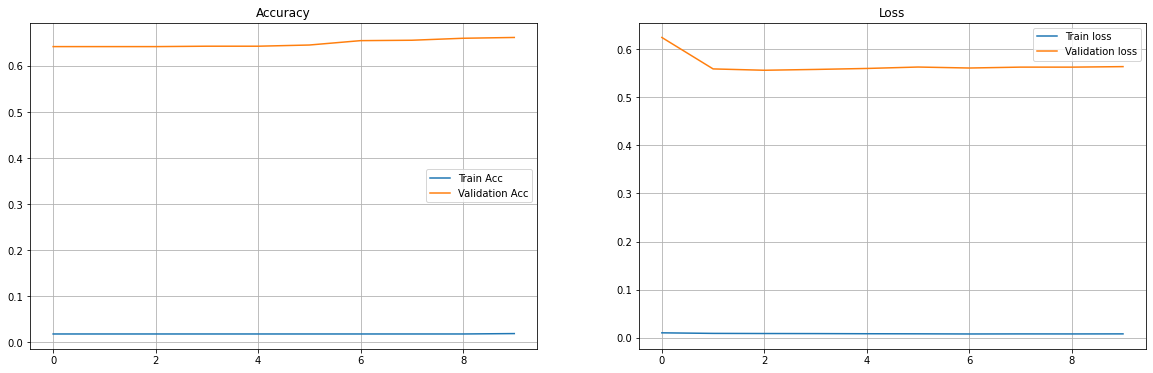

In [37]:
fig = plt.figure(figsize = (20, 6))
plt.subplot(1, 2, 1)
plt.plot(epoch_tr_acc, label='Train Acc')
plt.plot(epoch_vl_acc, label='Validation Acc')
plt.title("Accuracy")
plt.legend()
plt.grid()
    
plt.subplot(1, 2, 2)
plt.plot(epoch_tr_loss, label='Train loss')
plt.plot(epoch_vl_loss, label='Validation loss')
plt.title("Loss")
plt.legend()
plt.grid()

plt.show()

## Confusion Matrix for Binary Classification

<div align="center">
<img src="https://drive.google.com/uc?id=13brssGoI1ixObagNFyD60vTdO0dAlN5h" width="600" height="350">
</div>


- **True Positive (TP):** It refers to the number of predictions where the classifier correctly predicts the positive class as positive.
- **True Negative (TN):** It refers to the number of predictions where the classifier correctly predicts the negative class as negative.
- **False Positive (FP):** It refers to the number of predictions where the classifier incorrectly predicts the negative class as positive.
- **False Negative (FN):** It refers to the number of predictions where the classifier incorrectly predicts the positive class as negative.

In [38]:
TP=len(TP)
TN=len(TN)
FP=len(FP)
FN=len(FN)

acc=(TP+TN)/(TP+TN+FN+FP)
prec=TP/(TP+FP)
rec=TP/(TP+FN)
f1score=2*prec*rec/(prec+rec)

print('Accuracy: %f' % acc)
print('Precision: %f' % prec)
print('Recall: %f' % rec)
print('F1 score: %f' % f1score)

Accuracy: 0.770570
Precision: 0.872391
Recall: 0.868458
F1 score: 0.870420


# Convert text to word frequency vectors
# TF-IDF
 This is an acronym than stands for **Term Frequency – Inverse Document** Frequency which are the components of the resulting scores assigned to each word.

* Term Frequency: This summarizes how often a given word appears within a document.
* Inverse Document Frequency: This downscales words that appear a lot across documents.

In [39]:

#Convert a collection of raw documents to a matrix of TF-IDF features.
vector = TfidfVectorizer(sublinear_tf=True)
X = vector.fit_transform(df['processed_text']).toarray()
y= df['Sentiment'].to_numpy()
print(f'Vector fitted.')
print('No. of feature_words: ', len(vector.get_feature_names()))

X = torch.from_numpy(X)
y = torch.from_numpy(y)



Vector fitted.
No. of feature_words:  10514


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


## Split train and test

The Preprocessed Data is divided into 2 sets of data:

* Training Data: The dataset upon which the model would be trained on. Contains 80% data.
* Test Data: The dataset upon which the model would be tested against. Contains 20% data.




In [40]:
## Split the dataset into Training and Test set
X_train, X_test, y_train, y_test = train_test_split(X, y , test_size=0.2, random_state = seed)

X_train = X_train.type(torch.FloatTensor)
X_test = X_test.type(torch.FloatTensor)
y_train = y_train.type(torch.FloatTensor)
y_test = y_test.type(torch.FloatTensor)

In [41]:

#BATCH_SIZE = 264

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')



# Model Building <a id="7"></a>

**Neural Network**

In [42]:
class NeuralNetwork(nn.Module):
    def __init__(self, input_dim):
        super(NeuralNetwork, self).__init__()
        self.layer_1 = nn.Linear(input_dim, 512) 
        self.layer_2 = nn.Linear(512, 128) 
        self.layer_3 = nn.Linear(128, 1)   
        self.relu = nn.ReLU()
        self.sigmoid = nn.Sigmoid()
        self.dropout = nn.Dropout()
        # self.flatten = nn.Flatten()
       
     
  
        
    def forward(self, x):

        x = self.layer_1(x)
        x = self.dropout(x)
        x = self.relu(x)
        x = self.layer_2(x)
        x = self.dropout(x)
        x = self.relu(x)
        x = self.layer_3(x)
        logits = self.sigmoid(x)
        return logits

In [43]:
model = NeuralNetwork(len(vector.get_feature_names()))
print(model)



NeuralNetwork(
  (layer_1): Linear(in_features=10514, out_features=512, bias=True)
  (layer_2): Linear(in_features=512, out_features=128, bias=True)
  (layer_3): Linear(in_features=128, out_features=1, bias=True)
  (relu): ReLU()
  (sigmoid): Sigmoid()
  (dropout): Dropout(p=0.5, inplace=False)
)


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [44]:
"""
loss_fn = nn.BCELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=1e-3)

"""


import torch.optim as optim
optimizer = optim.Adam(model.parameters())

loss_fn = nn.BCEWithLogitsLoss()
model = model.to(device)
loss_fn = loss_fn.to(device)



In [45]:
def binary_accuracy(preds, y):
    """
    Returns accuracy per batch, i.e. if you get 8/10 right, this returns 0.8, NOT 8
    """

    #round predictions to the closest integer
    rounded_preds = torch.round(torch.sigmoid(preds))
    correct = (rounded_preds == y).float() #convert into float for division 
    acc = correct.sum() / len(correct)
    return acc

In [46]:

def trainModel(model, loss_fn, optimizer):
    model.train()

    batch = 128
    size = X_test.shape[0]

    loss = 0
    acc = 0
    

    for i in range(X_train.shape[0]):
      x, y = X_train[i], torch.tensor([y_train[i]], dtype=torch.float)
    
      # Compute prediction 
      pred = model(x)
      loss += loss_fn(pred,y)
      acc += binary_accuracy(pred,y)
      
      if i>0 and (i+1)%batch == 0:
          # Backpropagation
          optimizer.zero_grad()
          loss.backward()
          optimizer.step()
         # print(f'Training Loss: {loss.item():.4f}', end="\r")
         # print(f'\tTraining Loss: {loss.item():.3f} | Training Acc: {acc.item()*100:.2f}%')
          loss = 0
          acc = 0
    print()
    return loss.item()/size, acc.item()/size




In [47]:
TP=[]
TN=[]
FP=[]
FN=[]
def testModel(model, loss_fn):
    model.eval()

    size = X_test.shape[0]

    loss = 0
    acc = 0



    with torch.no_grad():
      for i in range(X_test.shape[0]):
        x, y = X_test[i], torch.tensor([y_test[i]], dtype=torch.float)
    
        # Compute prediction error
        pred = model(x)
        if( (torch.round(pred)) == 1 and y== 0) :
           FP.append(1)
        if( (torch.round(pred)) == 0 and y== 1) :
           FN.append(1)
        if( (torch.round(pred)) == 1 and y== 1) :
           TP.append(1)
        if( (torch.round(pred)) == 0 and y== 0) :
           TP.append(1)         
       
            
        loss += loss_fn(pred, y).item()
        acc += binary_accuracy(pred,y).item()
      
    loss /= size
    acc /= size
    
    #print(f'Testing Loss: {loss}')
    #print(f'\t Val. Loss: {loss:.3f} |  Val. Acc: {acc*100:.2f}%')
  
    return loss, acc  

In [48]:
import time

def epoch_time(start_time, end_time):
    elapsed_time = end_time - start_time
    elapsed_mins = int(elapsed_time / 60)
    elapsed_secs = int(elapsed_time - (elapsed_mins * 60))
    return elapsed_mins, elapsed_secs

In [49]:

epochs = 10
best_valid_loss = float('inf')

# train for some number of epochs
epoch_tr_loss,epoch_vl_loss = [],[]
epoch_tr_acc,epoch_vl_acc = [],[]

for epoch in range(epochs):
    #print(f"Epoch {t+1}\n-------------------------------")
    start_time = time.time()

    train_loss,train_acc = trainModel(model, loss_fn, optimizer)
    valid_loss, valid_acc = testModel(model, loss_fn)

    end_time = time.time()

    epoch_mins, epoch_secs = epoch_time(start_time, end_time)
    
    if valid_loss < best_valid_loss:
        best_valid_loss = valid_loss
        torch.save(model.state_dict(), 'stock_sentiment_tf_idf.pt')
    
    print(f'Epoch: {epoch+1:02} | Epoch Time: {epoch_mins}m {epoch_secs}s')
    print(f'\tTrain Loss: {train_loss:.3f} | Train Acc: {train_acc*100:.2f}%')
    print(f'\t Val. Loss: {valid_loss:.3f} |  Val. Acc: {valid_acc*100:.2f}%')
    
    epoch_tr_loss.append(train_loss)
    epoch_vl_loss.append(valid_loss)
    epoch_tr_acc.append(train_acc)
    epoch_vl_acc.append(valid_acc)
  
    
print("Done!")





Epoch: 01 | Epoch Time: 0m 43s
	Train Loss: 0.011 | Train Acc: 1.81%
	 Val. Loss: 0.642 |  Val. Acc: 64.19%

Epoch: 02 | Epoch Time: 0m 43s
	Train Loss: 0.009 | Train Acc: 1.81%
	 Val. Loss: 0.572 |  Val. Acc: 64.19%

Epoch: 03 | Epoch Time: 0m 42s
	Train Loss: 0.009 | Train Acc: 1.81%
	 Val. Loss: 0.559 |  Val. Acc: 64.19%

Epoch: 04 | Epoch Time: 0m 42s
	Train Loss: 0.008 | Train Acc: 1.81%
	 Val. Loss: 0.562 |  Val. Acc: 64.19%

Epoch: 05 | Epoch Time: 0m 42s
	Train Loss: 0.008 | Train Acc: 1.81%
	 Val. Loss: 0.566 |  Val. Acc: 64.19%

Epoch: 06 | Epoch Time: 0m 42s
	Train Loss: 0.008 | Train Acc: 1.81%
	 Val. Loss: 0.566 |  Val. Acc: 64.19%

Epoch: 07 | Epoch Time: 0m 43s
	Train Loss: 0.008 | Train Acc: 1.81%
	 Val. Loss: 0.568 |  Val. Acc: 64.19%

Epoch: 08 | Epoch Time: 0m 42s
	Train Loss: 0.009 | Train Acc: 1.81%
	 Val. Loss: 0.566 |  Val. Acc: 64.19%

Epoch: 09 | Epoch Time: 0m 43s
	Train Loss: 0.008 | Train Acc: 1.81%
	 Val. Loss: 0.565 |  Val. Acc: 64.19%

Epoch: 10 | Epoch 

In [50]:
model.load_state_dict(torch.load('stock_sentiment_tf_idf.pt'))

test_loss, test_acc = testModel(model, loss_fn)

print(f'Test Loss: {test_loss:.3f} | Test Acc: {test_acc*100:.2f}%')

Test Loss: 0.559 | Test Acc: 64.19%


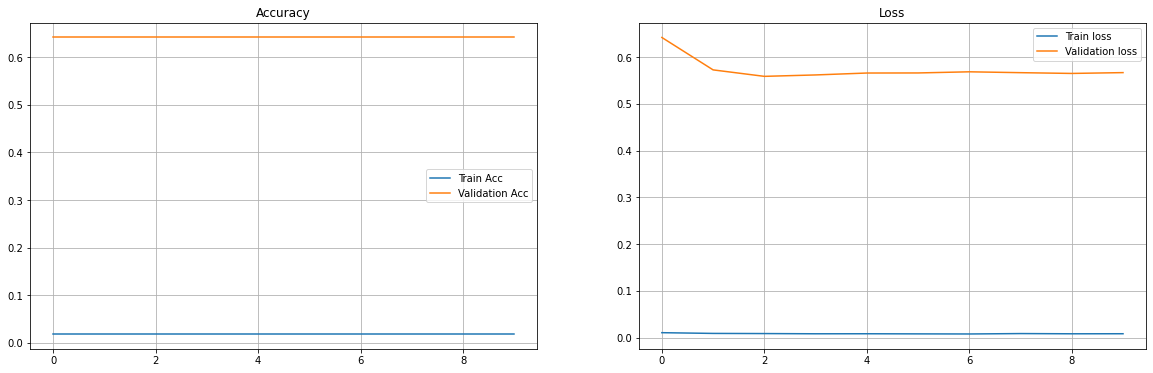

In [77]:
fig = plt.figure(figsize = (20, 6))
plt.subplot(1, 2, 1)
plt.plot(epoch_tr_acc, label='Train Acc')
plt.plot(epoch_vl_acc, label='Validation Acc')
plt.title("Accuracy")
plt.legend()
plt.grid()
    
plt.subplot(1, 2, 2)
plt.plot(epoch_tr_loss, label='Train loss')
plt.plot(epoch_vl_loss, label='Validation loss')
plt.title("Loss")
plt.legend()
plt.grid()

plt.show()

## Confusion Matrix for Binary Classification

<div align="center">
<img src="https://drive.google.com/uc?id=13brssGoI1ixObagNFyD60vTdO0dAlN5h" width="600" height="350">
</div>


- **True Positive (TP):** It refers to the number of predictions where the classifier correctly predicts the positive class as positive.
- **True Negative (TN):** It refers to the number of predictions where the classifier correctly predicts the negative class as negative.
- **False Positive (FP):** It refers to the number of predictions where the classifier incorrectly predicts the negative class as positive.
- **False Negative (FN):** It refers to the number of predictions where the classifier incorrectly predicts the positive class as negative.

In [52]:
TP=len(TP)
TN=len(TN)
FP=len(FP)
FN=len(FN)

acc=(TP+TN)/(TP+TN+FN+FP)
prec=TP/(TP+FP)
rec=TP/(TP+FN)
f1score=2*prec*rec/(prec+rec)

print('Accuracy: %f' % acc)
print('Precision: %f' % prec)
print('Recall: %f' % rec)
print('F1 score: %f' % f1score)

Accuracy: 0.768060
Precision: 0.864636
Recall: 0.873039
F1 score: 0.868817


# CNN with One-Hot Embedding

## One-Hot Representation

The one­ hot representation, as the name suggests, starts with a zero vector, and sets as 1 the corresponding entry in the vector if the word is present in the sentence or document. 

Tokenizing the sentences, ignoring punctuation, and treating everything as lowercase, will yield a vocabulary of size 8: `{time, fruit, flies, like, a, an, arrow, banana}`. 

The binary encoding for **“like a banana”** would then be: 

```
[0, 0, 0, 1, 1, 0, 0, 1]
```



In [53]:
one_hot_vectorizer = CountVectorizer(binary=True)
X = one_hot_vectorizer.fit_transform(df['processed_text']).toarray()
y= df['Sentiment'].to_numpy()

X = torch.from_numpy(X)
y = torch.from_numpy(y)


print (X)
print (one_hot_vectorizer.vocabulary_)

tensor([[0, 0, 0,  ..., 0, 0, 0],
        [0, 0, 0,  ..., 0, 0, 0],
        [0, 0, 0,  ..., 0, 0, 0],
        ...,
        [0, 0, 0,  ..., 0, 0, 0],
        [0, 0, 0,  ..., 0, 0, 0],
        [0, 0, 0,  ..., 0, 0, 0]])
{'ickers': 5637, 'watchlist': 10110, 'xide': 10372, 'tit': 9547, 'soq': 8934, 'pnk': 7711, 'cpw': 3586, 'bpz': 2903, 'aj': 2161, 'trade': 9637, 'method': 6620, 'see': 8575, 'prev': 7839, 'post': 7760, 'ser': 8617, 'aap': 1957, 'movie': 6788, '55': 1455, 'return': 8300, 'feageed': 4726, 'indicator': 5770, '15': 353, 'year': 10410, 'awesome': 2546, 'id': 5638, 'afraid': 2099, 'short': 8705, 'amzn': 2265, 'looking': 6383, 'like': 6313, 'nearmonopoly': 6907, 'ebooks': 4220, 'infrastructureasaservice': 5796, 'nta': 7065, '1200': 196, '2137': 673, 'gnx': 5155, '304': 901, 'ap': 2335, 'user': 9911, 'current': 3678, 'downtrend': 4084, 'break': 2915, 'otherwise': 7347, 'shortterm': 8717, 'correction': 3543, 'medterm': 6589, 'ondays': 7229, 'relative': 8197, 'weakness': 10138, 'nyx

## Split train and test

The Preprocessed Data is divided into 2 sets of data:

* Training Data: The dataset upon which the model would be trained on. Contains 80% data.
* Test Data: The dataset upon which the model would be tested against. Contains 20% data.




In [54]:
!pip install contractions
!pip install textsearch
!pip install tqdm
import nltk
nltk.download('punkt')

     |████████████████████████████████| 321 kB 14.1 MB/s 
     |████████████████████████████████| 284 kB 62.0 MB/s 
  Created wheel for pyahocorasick: filename=pyahocorasick-1.4.2-cp37-cp37m-linux_x86_64.whl size=85440 sha256=60b604b5385ac6e370729a05f5a2efa4b92b314170e7c7c31c8be171556ad2d8
  Stored in directory: /root/.cache/pip/wheels/25/19/a6/8f363d9939162782bb8439d886469756271abc01f76fbd790f
Successfully built pyahocorasick
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [55]:
import pandas as pd
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Conv1D
from tensorflow.keras.layers import MaxPooling1D
from tensorflow.keras.layers import Embedding
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing import sequence
from sklearn.preprocessing import LabelEncoder

# fix random seed for reproducibility
seed = 170204067
np.random.seed(seed)

In [56]:
dataset = pd.read_csv("/content/gdrive/MyDrive/AUST/CSE 4.2/CSE 4238 Soft Computing Lab/Online/Assignment-2/Dataset.csv")


In [57]:
# build train and test datasets
reviews = dataset['Text'].values
sentiments = dataset['Sentiment'].values

train_reviews = reviews[:35000]
train_sentiments = sentiments[:35000]

test_reviews = reviews[35000:]
test_sentiments = sentiments[35000:]

In [58]:
import contractions
from bs4 import BeautifulSoup
import numpy as np
import re
import tqdm
import unicodedata


def strip_html_tags(text):
  soup = BeautifulSoup(text, "html.parser")
  [s.extract() for s in soup(['iframe', 'script'])]
  stripped_text = soup.get_text()
  stripped_text = re.sub(r'[\r|\n|\r\n]+', '\n', stripped_text)
  return stripped_text

def remove_accented_chars(text):
  text = unicodedata.normalize('NFKD', text).encode('ascii', 'ignore').decode('utf-8', 'ignore')
  return text

def pre_process_corpus(docs):
  norm_docs = []
  for doc in tqdm.tqdm(docs):
    doc = strip_html_tags(doc)
    doc = doc.translate(doc.maketrans("\n\t\r", "   "))
    doc = doc.lower()
    doc = remove_accented_chars(doc)
    doc = contractions.fix(doc)
    # lower case and remove special characters\whitespaces
    doc = re.sub(r'[^a-zA-Z0-9\s]', '', doc, re.I|re.A)
    doc = re.sub(' +', ' ', doc)
    doc = doc.strip()  
    norm_docs.append(doc)
  
  return norm_docs

In [59]:
norm_train_reviews = pre_process_corpus(train_reviews)
norm_test_reviews = pre_process_corpus(test_reviews)

100%|██████████| 5791/5791 [00:00<00:00, 8288.78it/s]
0it [00:00, ?it/s]


In [60]:
t = Tokenizer(oov_token='<UNK>')
# fit the tokenizer on the documents
t.fit_on_texts(norm_train_reviews)
t.word_index['<PAD>'] = 0

In [61]:
train_sequences = t.texts_to_sequences(norm_train_reviews)

In [62]:
test_sequences = t.texts_to_sequences(norm_test_reviews)

In [63]:
print("Vocabulary size={}".format(len(t.word_index)))
print("Number of Documents={}".format(t.document_count))

Vocabulary size=11662
Number of Documents=5791


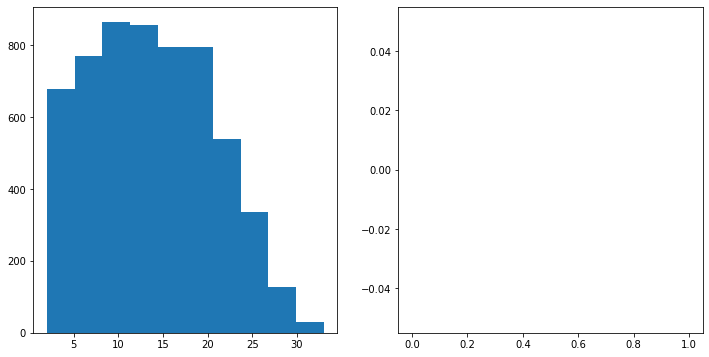

In [64]:
import matplotlib.pyplot as plt
%matplotlib inline

train_lens = [len(s) for s in train_sequences]
test_lens = [len(s) for s in test_sequences]

fig, ax = plt.subplots(1,2, figsize=(12, 6))
h1 = ax[0].hist(train_lens)
h2 = ax[1].hist(test_lens)

In [65]:
MAX_SEQUENCE_LENGTH = 1000

In [66]:
# pad dataset to a maximum review length in words
X_train = sequence.pad_sequences(train_sequences, maxlen=MAX_SEQUENCE_LENGTH)
X_test = sequence.pad_sequences(test_sequences, maxlen=MAX_SEQUENCE_LENGTH)
X_train.shape, X_test.shape

((5791, 1000), (0, 1000))

In [67]:
le = LabelEncoder()
num_classes=2 # positive -> 1, negative -> 0

In [68]:
y_train = le.fit_transform(train_sentiments)
y_test = le.transform(test_sentiments)

In [69]:
VOCAB_SIZE = len(t.word_index)


In [70]:
EMBED_SIZE = 300
EPOCHS=2
BATCH_SIZE=128

In [71]:
# create the model
model = Sequential()
model.add(Embedding(VOCAB_SIZE, EMBED_SIZE, input_length=MAX_SEQUENCE_LENGTH))
model.add(Conv1D(filters=128, kernel_size=4, padding='same', activation='relu'))
model.add(MaxPooling1D(pool_size=2))
model.add(Conv1D(filters=64, kernel_size=4, padding='same', activation='relu'))
model.add(MaxPooling1D(pool_size=2))
model.add(Conv1D(filters=32, kernel_size=4, padding='same', activation='relu'))
model.add(MaxPooling1D(pool_size=2))
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 1000, 300)         3498600   
                                                                 
 conv1d (Conv1D)             (None, 1000, 128)         153728    
                                                                 
 max_pooling1d (MaxPooling1D  (None, 500, 128)         0         
 )                                                               
                                                                 
 conv1d_1 (Conv1D)           (None, 500, 64)           32832     
                                                                 
 max_pooling1d_1 (MaxPooling  (None, 250, 64)          0         
 1D)                                                             
                                                                 
 conv1d_2 (Conv1D)           (None, 250, 32)           8

In [72]:
# Fit the model
model.fit(X_train, y_train, 
          validation_split=0.1,
          epochs=EPOCHS, 
          batch_size=BATCH_SIZE, 
          verbose=1)

Epoch 1/2
41/41 [==============================] - 112s 3s/step - loss: 0.6481 - accuracy: 0.6603 - val_loss: 0.8390 - val_accuracy: 0.4207
Epoch 2/2
41/41 [==============================] - 92s 2s/step - loss: 0.4499 - accuracy: 0.7926 - val_loss: 0.6621 - val_accuracy: 0.6414
